In [2]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date, time
import pandas as pd
import os 
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
cwd = os.getcwd()
date = datetime.now().strftime("%Y%m%d")

data_path = f'{cwd}/Data/raw/'
df = pd.read_csv(f'{data_path}/230602_celldataroot.csv')
df['cluster_num'] = pd.read_csv(f'{data_path}/230602_clustering_k30_20markers.csv')['kinv33']
df.head()


C:\Users\jhroe\AppData\Local\Temp\ipykernel_5376\3409896398.py:5: DtypeWarning: Columns (55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f'{data_path}/230602_celldataroot.csv')


,MI_Argon80,MI_B220,MI_CD103,MI_CD11b,MI_CD11c,MI_CD206,MI_CD24,MI_CD3,MI_CD44,MI_CD45,...,Number_Object_Number,AreaShape_Area,AreaShape_MajorAxisLength,AreaShape_Perimeter,ImageNumber,filename,ExpGroup,ROI_ID,MouseID,cluster_num
0,0.910691,0.000000,0.034952,0.034466,0.272337,0.006548,0.022659,0.008725,0.254023,0.193575,...,1,74,12.630045,33.142136,1,MOC1_MOCAF_1B_2_ROI1_x1,MOC1_MOCAF,01_MOC1_MOCAF,MOC1_MOCAF_1B_2,1
1,0.908090,0.010234,0.035593,0.023399,0.128000,0.000000,0.008974,0.035540,0.737542,0.107524,...,2,109,13.345275,40.970563,1,MOC1_MOCAF_1B_2_ROI1_x1,MOC1_MOCAF,01_MOC1_MOCAF,MOC1_MOCAF_1B_2,2
2,0.903159,0.008924,0.103457,0.076814,0.145721,0.000000,0.381189,0.175614,0.061922,0.140641,...,3,125,13.367977,45.006097,1,MOC1_MOCAF_1B_2_ROI1_x1,MOC1_MOCAF,01_MOC1_MOCAF,MOC1_MOCAF_1B_2,3
3,0.903061,0.003553,0.008237,0.013378,0.088867,0.000000,0.017800,0.049348,0.121296,0.049767,...,4,157,15.449750,60.213203,1,MOC1_MOCAF_1B_2_ROI1_x1,MOC1_MOCAF,01_MOC1_MOCAF,MOC1_MOCAF_1B_2,2
4,0.914491,0.107951,0.000000,0.004840,0.112517,0.007815,0.245658,0.041654,0.071339,0.126023,...,5,31,9.904825,21.278175,1,MOC1_MOCAF_1B_2_ROI1_x1,MOC1_MOCAF,01_MOC1_MOCAF,MOC1_MOCAF_1B_2,3


In [4]:
df['cluster_num'] = df['cluster_num'].astype(str).str.zfill(2)
df.loc[(df['cluster_num'] == '17') & (df['MI_Foxp3'] >= 0.25), 'cluster_num'] = '17A'
df.loc[(df['cluster_num'] == '17'), 'cluster_num'] = '17A'

In [5]:
# Mapping nums to clustering based on JanPieters markdown
original_dict = {
    "01": "01_Tumour",
    "02": "02_Tumour",
    "03": "03_Tumour",
    "04": "04_Tumour",
    "05": "05_Endothelium Thy1-",
    "06": "06_Tumour",
    "07": "07_Fibroblasts",
    "08": "08_Dendritic cells",
    "09": "09_Neutrophils",
    "10": "10_Tumour",
    "11": "11_Tumour",
    "12": "12_Tumour",
    "13": "13_Tumour",
    "14": "14_T cell CD8",
    "15": "15_Neutrophils",
    "16": "16_cDC1 Dendritic cells",
    "17A": "17_T cell regulatory",
    "17B": "17_T cell CD4",
    "18": "18_Tumour",
    "19": "19_Neutrophils",
    "20": "20_Macrophages F480",
    "21": "21_Endothelium Thy1+",
    "22": "22_Undefined",
    "23": "23_Endothelium Thy1+",
    "24": "24_Macrophages CD68",
    "25": "25_Endothelium Thy1+",
    "26": "26_Neutrophils",
    "27": "27_Dendritic cells",
    "28": "28_Tumour",
    "29": "29_Tumour",
    "30": "30_Tumour",
    "31": "31_Undefined",
    "32": "32_Tumour",
    "33": "33_Neutrophils",
    "34": "34_Undefined",
    "00_Undefined": "00_Undefined"
}

df['cluster_num'] = df['cluster_num'].map(original_dict)


In [6]:
groups = ['MOC1_MOCAF', 'MOC1_WT', 'MOC2_CCR2KO', 'MOC2_WT']
group_dict = {}
for group in groups:
    group_dict[group] = df[df['ExpGroup'] == group].iloc[:,41:]

group_dict['MOC1_MOCAF']


,ObjectNumber,Location_Center_X,Location_Center_Y,MI_TumourminusInterface,MI_NormalminusInterface,MI_InterfaceImage,Number_Object_Number,AreaShape_Area,AreaShape_MajorAxisLength,AreaShape_Perimeter,ImageNumber,filename,ExpGroup,ROI_ID,MouseID,cluster_num
0,1,363.662162,4.594595,0.0,0.0,1.0,1,74,12.630045,33.142136,1,MOC1_MOCAF_1B_2_ROI1_x1,MOC1_MOCAF,01_MOC1_MOCAF,MOC1_MOCAF_1B_2,01_Tumour
1,2,451.422018,5.192661,1.0,0.0,0.0,2,109,13.345275,40.970563,1,MOC1_MOCAF_1B_2_ROI1_x1,MOC1_MOCAF,01_MOC1_MOCAF,MOC1_MOCAF_1B_2,02_Tumour
2,3,1225.016000,8.608000,1.0,0.0,0.0,3,125,13.367977,45.006097,1,MOC1_MOCAF_1B_2_ROI1_x1,MOC1_MOCAF,01_MOC1_MOCAF,MOC1_MOCAF_1B_2,03_Tumour
3,4,1515.503185,9.898089,0.0,0.0,0.0,4,157,15.449750,60.213203,1,MOC1_MOCAF_1B_2_ROI1_x1,MOC1_MOCAF,01_MOC1_MOCAF,MOC1_MOCAF_1B_2,02_Tumour
4,5,2268.290323,4.580645,0.0,0.0,0.0,5,31,9.904825,21.278175,1,MOC1_MOCAF_1B_2_ROI1_x1,MOC1_MOCAF,01_MOC1_MOCAF,MOC1_MOCAF_1B_2,03_Tumour
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275590,69786,2594.564103,3200.102564,0.0,0.0,0.0,69786,39,8.915939,22.727922,1,MOC1_MOCAF_2R_4_ROI1_1,MOC1_MOCAF,05_MOC1_MOCAF,MOC1_MOCAF_2R_4,03_Tumour
275591,69787,2556.913043,3201.934783,0.0,0.0,0.0,69787,46,9.539702,25.313708,1,MOC1_MOCAF_2R_4_ROI1_1,MOC1_MOCAF,05_MOC1_MOCAF,MOC1_MOCAF_2R_4,06_Tumour
275592,69788,2659.285714,3201.190476,1.0,0.0,0.0,69788,21,6.065470,13.242641,1,MOC1_MOCAF_2R_4_ROI1_1,MOC1_MOCAF,05_MOC1_MOCAF,MOC1_MOCAF_2R_4,07_Fibroblasts
275593,69789,2681.300000,3201.233333,1.0,0.0,0.0,69789,30,7.468540,18.485281,1,MOC1_MOCAF_2R_4_ROI1_1,MOC1_MOCAF,05_MOC1_MOCAF,MOC1_MOCAF_2R_4,03_Tumour


In [7]:
df

,MI_Argon80,MI_B220,MI_CD103,MI_CD11b,MI_CD11c,MI_CD206,MI_CD24,MI_CD3,MI_CD44,MI_CD45,...,Number_Object_Number,AreaShape_Area,AreaShape_MajorAxisLength,AreaShape_Perimeter,ImageNumber,filename,ExpGroup,ROI_ID,MouseID,cluster_num
0,0.910691,0.000000,0.034952,0.034466,0.272337,0.006548,0.022659,0.008725,0.254023,0.193575,...,1,74,12.630045,33.142136,1,MOC1_MOCAF_1B_2_ROI1_x1,MOC1_MOCAF,01_MOC1_MOCAF,MOC1_MOCAF_1B_2,01_Tumour
1,0.908090,0.010234,0.035593,0.023399,0.128000,0.000000,0.008974,0.035540,0.737542,0.107524,...,2,109,13.345275,40.970563,1,MOC1_MOCAF_1B_2_ROI1_x1,MOC1_MOCAF,01_MOC1_MOCAF,MOC1_MOCAF_1B_2,02_Tumour
2,0.903159,0.008924,0.103457,0.076814,0.145721,0.000000,0.381189,0.175614,0.061922,0.140641,...,3,125,13.367977,45.006097,1,MOC1_MOCAF_1B_2_ROI1_x1,MOC1_MOCAF,01_MOC1_MOCAF,MOC1_MOCAF_1B_2,03_Tumour
3,0.903061,0.003553,0.008237,0.013378,0.088867,0.000000,0.017800,0.049348,0.121296,0.049767,...,4,157,15.449750,60.213203,1,MOC1_MOCAF_1B_2_ROI1_x1,MOC1_MOCAF,01_MOC1_MOCAF,MOC1_MOCAF_1B_2,02_Tumour
4,0.914491,0.107951,0.000000,0.004840,0.112517,0.007815,0.245658,0.041654,0.071339,0.126023,...,5,31,9.904825,21.278175,1,MOC1_MOCAF_1B_2_ROI1_x1,MOC1_MOCAF,01_MOC1_MOCAF,MOC1_MOCAF_1B_2,03_Tumour
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379010,0.493752,1.065478,0.074863,0.083954,0.029914,0.175312,0.084934,0.024917,0.120118,0.113077,...,90520,78,12.854966,35.798990,1,MOC2_WT_NM_1_ROI1_1,MOC2_WT,20_MOC2_WT,MOC2_WT_NM_1,05_Endothelium Thy1-
1379011,0.496681,0.062183,0.252315,0.016726,0.043208,0.027011,0.140208,0.287928,0.091318,0.072593,...,90521,27,7.176880,17.656854,1,MOC2_WT_NM_1_ROI1_1,MOC2_WT,20_MOC2_WT,MOC2_WT_NM_1,31_Undefined
1379012,0.491890,0.000000,0.022373,0.012977,0.006705,0.002096,0.008461,0.044679,0.213259,0.056322,...,90522,87,14.147427,39.349242,1,MOC2_WT_NM_1_ROI1_1,MOC2_WT,20_MOC2_WT,MOC2_WT_NM_1,28_Tumour
1379013,0.490049,2.198605,0.185374,0.010753,0.138884,0.078139,0.085126,0.000000,0.076316,0.093333,...,90523,21,6.519761,15.485281,1,MOC2_WT_NM_1_ROI1_1,MOC2_WT,20_MOC2_WT,MOC2_WT_NM_1,22_Undefined


In [22]:
df.iloc[:,40:]

,MI_pS6,ObjectNumber,Location_Center_X,Location_Center_Y,MI_TumourminusInterface,MI_NormalminusInterface,MI_InterfaceImage,Number_Object_Number,AreaShape_Area,AreaShape_MajorAxisLength,AreaShape_Perimeter,ImageNumber,filename,ExpGroup,ROI_ID,MouseID,cluster_num
0,0.339241,1,363.662162,4.594595,0.0,0.000000,1.0,1,74,12.630045,33.142136,1,MOC1_MOCAF_1B_2_ROI1_x1,MOC1_MOCAF,01_MOC1_MOCAF,MOC1_MOCAF_1B_2,01_Tumour
1,0.565815,2,451.422018,5.192661,1.0,0.000000,0.0,2,109,13.345275,40.970563,1,MOC1_MOCAF_1B_2_ROI1_x1,MOC1_MOCAF,01_MOC1_MOCAF,MOC1_MOCAF_1B_2,02_Tumour
2,0.468026,3,1225.016000,8.608000,1.0,0.000000,0.0,3,125,13.367977,45.006097,1,MOC1_MOCAF_1B_2_ROI1_x1,MOC1_MOCAF,01_MOC1_MOCAF,MOC1_MOCAF_1B_2,03_Tumour
3,0.068330,4,1515.503185,9.898089,0.0,0.000000,0.0,4,157,15.449750,60.213203,1,MOC1_MOCAF_1B_2_ROI1_x1,MOC1_MOCAF,01_MOC1_MOCAF,MOC1_MOCAF_1B_2,02_Tumour
4,0.021016,5,2268.290323,4.580645,0.0,0.000000,0.0,5,31,9.904825,21.278175,1,MOC1_MOCAF_1B_2_ROI1_x1,MOC1_MOCAF,01_MOC1_MOCAF,MOC1_MOCAF_1B_2,03_Tumour
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379010,0.027657,90520,460.512821,3334.769231,0.0,0.948718,0.0,90520,78,12.854966,35.798990,1,MOC2_WT_NM_1_ROI1_1,MOC2_WT,20_MOC2_WT,MOC2_WT_NM_1,05_Endothelium Thy1-
1379011,0.096845,90521,822.925926,3333.333333,0.0,0.000000,0.0,90521,27,7.176880,17.656854,1,MOC2_WT_NM_1_ROI1_1,MOC2_WT,20_MOC2_WT,MOC2_WT_NM_1,31_Undefined
1379012,0.000000,90522,1299.333333,3336.103448,0.0,0.000000,0.0,90522,87,14.147427,39.349242,1,MOC2_WT_NM_1_ROI1_1,MOC2_WT,20_MOC2_WT,MOC2_WT_NM_1,28_Tumour
1379013,0.028016,90523,540.190476,3334.000000,0.0,0.000000,0.0,90523,21,6.519761,15.485281,1,MOC2_WT_NM_1_ROI1_1,MOC2_WT,20_MOC2_WT,MOC2_WT_NM_1,22_Undefined


In [9]:
group_dict['MOC1_MOCAF']


,ObjectNumber,Location_Center_X,Location_Center_Y,MI_TumourminusInterface,MI_NormalminusInterface,MI_InterfaceImage,Number_Object_Number,AreaShape_Area,AreaShape_MajorAxisLength,AreaShape_Perimeter,ImageNumber,filename,ExpGroup,ROI_ID,MouseID,cluster_num
0,1,363.662162,4.594595,0.0,0.0,1.0,1,74,12.630045,33.142136,1,MOC1_MOCAF_1B_2_ROI1_x1,MOC1_MOCAF,01_MOC1_MOCAF,MOC1_MOCAF_1B_2,01_Tumour
1,2,451.422018,5.192661,1.0,0.0,0.0,2,109,13.345275,40.970563,1,MOC1_MOCAF_1B_2_ROI1_x1,MOC1_MOCAF,01_MOC1_MOCAF,MOC1_MOCAF_1B_2,02_Tumour
2,3,1225.016000,8.608000,1.0,0.0,0.0,3,125,13.367977,45.006097,1,MOC1_MOCAF_1B_2_ROI1_x1,MOC1_MOCAF,01_MOC1_MOCAF,MOC1_MOCAF_1B_2,03_Tumour
3,4,1515.503185,9.898089,0.0,0.0,0.0,4,157,15.449750,60.213203,1,MOC1_MOCAF_1B_2_ROI1_x1,MOC1_MOCAF,01_MOC1_MOCAF,MOC1_MOCAF_1B_2,02_Tumour
4,5,2268.290323,4.580645,0.0,0.0,0.0,5,31,9.904825,21.278175,1,MOC1_MOCAF_1B_2_ROI1_x1,MOC1_MOCAF,01_MOC1_MOCAF,MOC1_MOCAF_1B_2,03_Tumour
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275590,69786,2594.564103,3200.102564,0.0,0.0,0.0,69786,39,8.915939,22.727922,1,MOC1_MOCAF_2R_4_ROI1_1,MOC1_MOCAF,05_MOC1_MOCAF,MOC1_MOCAF_2R_4,03_Tumour
275591,69787,2556.913043,3201.934783,0.0,0.0,0.0,69787,46,9.539702,25.313708,1,MOC1_MOCAF_2R_4_ROI1_1,MOC1_MOCAF,05_MOC1_MOCAF,MOC1_MOCAF_2R_4,06_Tumour
275592,69788,2659.285714,3201.190476,1.0,0.0,0.0,69788,21,6.065470,13.242641,1,MOC1_MOCAF_2R_4_ROI1_1,MOC1_MOCAF,05_MOC1_MOCAF,MOC1_MOCAF_2R_4,07_Fibroblasts
275593,69789,2681.300000,3201.233333,1.0,0.0,0.0,69789,30,7.468540,18.485281,1,MOC1_MOCAF_2R_4_ROI1_1,MOC1_MOCAF,05_MOC1_MOCAF,MOC1_MOCAF_2R_4,03_Tumour


In [19]:
temp = df[['MouseID','ROI_ID']].drop_duplicates()
temp

,MouseID,ROI_ID
0,MOC1_MOCAF_1B_2,01_MOC1_MOCAF
39188,MOC1_MOCAF_1L_1,02_MOC1_MOCAF
121969,MOC1_MOCAF_1R_3,03_MOC1_MOCAF
159874,MOC1_MOCAF_1R_3,04_MOC1_MOCAF
205805,MOC1_MOCAF_2R_4,05_MOC1_MOCAF
275595,NaN,06_MOC1_WT
362666,NaN,07_MOC1_WT
453847,MOC1_WT_2R_3,08_MOC1_WT
499074,MOC1_WT_NM_5,09_MOC1_WT
622212,MOC1_WT_NM_5,10_MOC1_WT


In [11]:
group_dict['MOC1_MOCAF']['MouseID'].unique()

array(['MOC1_MOCAF_1B_2', 'MOC1_MOCAF_1L_1', 'MOC1_MOCAF_1R_3',
       'MOC1_MOCAF_2R_4'], dtype=object)

In [12]:
duplicate_first = df[['MouseID','ROI_ID', 'ObjectNumber']][df[['MouseID','ROI_ID', 'ObjectNumber']].duplicated(keep=False)]
# duplicate_last = df[['MouseID','ROI_ID', 'ObjectNumber']][df[['MouseID','ROI_ID', 'ObjectNumber']].duplicated(keep='last')]

In [13]:
duplicate_first.sort_values(by=['ObjectNumber'])

,MouseID,ROI_ID,ObjectNumber
794623,MOC2_CCR2KO_2R_4,15_MOC2_CCR2KO,1
861258,MOC2_CCR2KO_2R_4,15_MOC2_CCR2KO,1
861259,MOC2_CCR2KO_2R_4,15_MOC2_CCR2KO,2
794624,MOC2_CCR2KO_2R_4,15_MOC2_CCR2KO,2
794625,MOC2_CCR2KO_2R_4,15_MOC2_CCR2KO,3
...,...,...,...
861255,MOC2_CCR2KO_2R_4,15_MOC2_CCR2KO,66633
927891,MOC2_CCR2KO_2R_4,15_MOC2_CCR2KO,66634
861256,MOC2_CCR2KO_2R_4,15_MOC2_CCR2KO,66634
861257,MOC2_CCR2KO_2R_4,15_MOC2_CCR2KO,66635


In [27]:
# Row 861258 and 794623 are from the same roi ID and mouse ID and have the same ObjectNumber (Cellnumber?) but have different locations and clusters
# This happens around 60k times in the mouse: MOC2_CCR2KO_2R_4 and ROI:	15_MOC2_CCR2KO group.
df['MouseID'].unique()

array(['MOC1_MOCAF_1B_2', 'MOC1_MOCAF_1L_1', 'MOC1_MOCAF_1R_3',
       'MOC1_MOCAF_2R_4', nan, 'MOC1_WT_2R_3', 'MOC1_WT_NM_5',
       'MOC2_CCR2KO_1B_3', 'MOC2_CCR2KO_1R_2', 'MOC2_CCR2KO_2R_4',
       'MOC2_CCR2KO_NM_1', 'MOC2_WT_1B_2', 'MOC2_WT_1R_4', 'MOC2_WT_2R_3',
       'MOC2_WT_NM_1'], dtype=object)

In [18]:
df

,MI_Argon80,MI_B220,MI_CD103,MI_CD11b,MI_CD11c,MI_CD206,MI_CD24,MI_CD3,MI_CD44,MI_CD45,...,Number_Object_Number,AreaShape_Area,AreaShape_MajorAxisLength,AreaShape_Perimeter,ImageNumber,filename,ExpGroup,ROI_ID,MouseID,cluster_num
0,0.910691,0.000000,0.034952,0.034466,0.272337,0.006548,0.022659,0.008725,0.254023,0.193575,...,1,74,12.630045,33.142136,1,MOC1_MOCAF_1B_2_ROI1_x1,MOC1_MOCAF,01_MOC1_MOCAF,MOC1_MOCAF_1B_2,01_Tumour
1,0.908090,0.010234,0.035593,0.023399,0.128000,0.000000,0.008974,0.035540,0.737542,0.107524,...,2,109,13.345275,40.970563,1,MOC1_MOCAF_1B_2_ROI1_x1,MOC1_MOCAF,01_MOC1_MOCAF,MOC1_MOCAF_1B_2,02_Tumour
2,0.903159,0.008924,0.103457,0.076814,0.145721,0.000000,0.381189,0.175614,0.061922,0.140641,...,3,125,13.367977,45.006097,1,MOC1_MOCAF_1B_2_ROI1_x1,MOC1_MOCAF,01_MOC1_MOCAF,MOC1_MOCAF_1B_2,03_Tumour
3,0.903061,0.003553,0.008237,0.013378,0.088867,0.000000,0.017800,0.049348,0.121296,0.049767,...,4,157,15.449750,60.213203,1,MOC1_MOCAF_1B_2_ROI1_x1,MOC1_MOCAF,01_MOC1_MOCAF,MOC1_MOCAF_1B_2,02_Tumour
4,0.914491,0.107951,0.000000,0.004840,0.112517,0.007815,0.245658,0.041654,0.071339,0.126023,...,5,31,9.904825,21.278175,1,MOC1_MOCAF_1B_2_ROI1_x1,MOC1_MOCAF,01_MOC1_MOCAF,MOC1_MOCAF_1B_2,03_Tumour
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379010,0.493752,1.065478,0.074863,0.083954,0.029914,0.175312,0.084934,0.024917,0.120118,0.113077,...,90520,78,12.854966,35.798990,1,MOC2_WT_NM_1_ROI1_1,MOC2_WT,20_MOC2_WT,MOC2_WT_NM_1,05_Endothelium Thy1-
1379011,0.496681,0.062183,0.252315,0.016726,0.043208,0.027011,0.140208,0.287928,0.091318,0.072593,...,90521,27,7.176880,17.656854,1,MOC2_WT_NM_1_ROI1_1,MOC2_WT,20_MOC2_WT,MOC2_WT_NM_1,31_Undefined
1379012,0.491890,0.000000,0.022373,0.012977,0.006705,0.002096,0.008461,0.044679,0.213259,0.056322,...,90522,87,14.147427,39.349242,1,MOC2_WT_NM_1_ROI1_1,MOC2_WT,20_MOC2_WT,MOC2_WT_NM_1,28_Tumour
1379013,0.490049,2.198605,0.185374,0.010753,0.138884,0.078139,0.085126,0.000000,0.076316,0.093333,...,90523,21,6.519761,15.485281,1,MOC2_WT_NM_1_ROI1_1,MOC2_WT,20_MOC2_WT,MOC2_WT_NM_1,22_Undefined


In [61]:
df.iloc[794623:, 40:]

,MI_pS6,ObjectNumber,Location_Center_X,Location_Center_Y,MI_TumourminusInterface,MI_NormalminusInterface,MI_InterfaceImage,Number_Object_Number,AreaShape_Area,AreaShape_MajorAxisLength,AreaShape_Perimeter,ImageNumber,filename,ExpGroup,ROI_ID,MouseID,cluster_num
794623,0.247502,1,74.842105,5.342105,1.00000,0.000000,0.00000,1,76,12.112684,32.142136,1,MOC2_CCR2KO_2R_4_ROI1,MOC2_CCR2KO,15_MOC2_CCR2KO,MOC2_CCR2KO_2R_4,25
794624,0.549600,2,157.050000,9.375000,0.01875,0.000000,0.98125,2,160,19.209010,60.941125,1,MOC2_CCR2KO_2R_4_ROI1,MOC2_CCR2KO,15_MOC2_CCR2KO,MOC2_CCR2KO_2R_4,25
794625,0.318910,3,228.666667,4.333333,0.00000,0.000000,1.00000,3,42,9.502201,24.485281,1,MOC2_CCR2KO_2R_4_ROI1,MOC2_CCR2KO,15_MOC2_CCR2KO,MOC2_CCR2KO_2R_4,25
794626,0.357408,4,273.039216,8.816993,0.00000,0.000000,1.00000,4,153,15.751245,51.491378,1,MOC2_CCR2KO_2R_4_ROI1,MOC2_CCR2KO,15_MOC2_CCR2KO,MOC2_CCR2KO_2R_4,25
794627,0.168842,5,488.820144,8.697842,1.00000,0.000000,0.00000,5,139,18.022058,51.077164,1,MOC2_CCR2KO_2R_4_ROI1,MOC2_CCR2KO,15_MOC2_CCR2KO,MOC2_CCR2KO_2R_4,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379010,0.027657,90520,460.512821,3334.769231,0.00000,0.948718,0.00000,90520,78,12.854966,35.798990,1,MOC2_WT_NM_1_ROI1_1,MOC2_WT,20_MOC2_WT,MOC2_WT_NM_1,5
1379011,0.096845,90521,822.925926,3333.333333,0.00000,0.000000,0.00000,90521,27,7.176880,17.656854,1,MOC2_WT_NM_1_ROI1_1,MOC2_WT,20_MOC2_WT,MOC2_WT_NM_1,31
1379012,0.000000,90522,1299.333333,3336.103448,0.00000,0.000000,0.00000,90522,87,14.147427,39.349242,1,MOC2_WT_NM_1_ROI1_1,MOC2_WT,20_MOC2_WT,MOC2_WT_NM_1,28
1379013,0.028016,90523,540.190476,3334.000000,0.00000,0.000000,0.00000,90523,21,6.519761,15.485281,1,MOC2_WT_NM_1_ROI1_1,MOC2_WT,20_MOC2_WT,MOC2_WT_NM_1,22


In [47]:
df[['MouseID','ROI_ID', 'ObjectNumber']][df[['MouseID','ROI_ID', 'ObjectNumber']].duplicated()]


,MouseID,ROI_ID,ObjectNumber
861258,MOC2_CCR2KO_2R_4,15_MOC2_CCR2KO,1
861259,MOC2_CCR2KO_2R_4,15_MOC2_CCR2KO,2
861260,MOC2_CCR2KO_2R_4,15_MOC2_CCR2KO,3
861261,MOC2_CCR2KO_2R_4,15_MOC2_CCR2KO,4
861262,MOC2_CCR2KO_2R_4,15_MOC2_CCR2KO,5
...,...,...,...
927888,MOC2_CCR2KO_2R_4,15_MOC2_CCR2KO,66631
927889,MOC2_CCR2KO_2R_4,15_MOC2_CCR2KO,66632
927890,MOC2_CCR2KO_2R_4,15_MOC2_CCR2KO,66633
927891,MOC2_CCR2KO_2R_4,15_MOC2_CCR2KO,66634


In [55]:
rows_with_nan = df[df.isnull().any(axis=1)]
rows_with_nan

,MI_Argon80,MI_B220,MI_CD103,MI_CD11b,MI_CD11c,MI_CD206,MI_CD24,MI_CD3,MI_CD44,MI_CD45,...,Number_Object_Number,AreaShape_Area,AreaShape_MajorAxisLength,AreaShape_Perimeter,ImageNumber,filename,ExpGroup,ROI_ID,MouseID,cluster_num
275595,0.382163,0.060159,0.227586,0.829547,0.521431,0.507514,0.217350,0.069640,0.307818,0.399205,...,1,216,25.541610,91.840620,1,MOC1_WT_1_ROI1_1,MOC1_WT,06_MOC1_WT,NaN,27_Dendritic cells
275596,0.384245,0.018998,0.029366,0.209516,0.558834,0.009628,0.028557,0.000000,0.301773,0.384419,...,2,108,18.532634,50.591883,1,MOC1_WT_1_ROI1_1,MOC1_WT,06_MOC1_WT,NaN,07_Fibroblasts
275597,0.385555,0.000000,0.027153,0.063002,0.335264,0.027470,0.063373,0.016268,0.384890,0.071091,...,3,146,17.292296,51.698485,1,MOC1_WT_1_ROI1_1,MOC1_WT,06_MOC1_WT,NaN,06_Tumour
275598,0.382206,0.000000,0.023668,0.016475,0.290812,0.000000,0.021737,0.059082,0.454961,0.035750,...,4,67,15.283304,35.556349,1,MOC1_WT_1_ROI1_1,MOC1_WT,06_MOC1_WT,NaN,06_Tumour
275599,0.382402,0.006874,0.019922,0.115556,0.728365,0.014182,0.032288,0.035805,0.333357,0.152460,...,5,199,18.377839,62.183766,1,MOC1_WT_1_ROI1_1,MOC1_WT,06_MOC1_WT,NaN,08_Dendritic cells
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453842,0.374852,0.572704,0.029509,0.445034,0.813588,0.801600,0.015942,0.014732,0.363516,0.430862,...,91177,46,8.524150,22.727922,1,MOC1_WT_2_ROI1_1,MOC1_WT,07_MOC1_WT,NaN,08_Dendritic cells
453843,0.375890,0.000000,0.496612,0.015363,0.069453,0.000000,0.075123,0.000000,0.098554,0.166692,...,91178,41,8.153492,22.692388,1,MOC1_WT_2_ROI1_1,MOC1_WT,07_MOC1_WT,NaN,16_cDC1 Dendritic cells
453844,0.377642,0.000000,0.000000,0.010860,0.028055,0.000000,0.075863,0.023369,0.100796,0.141401,...,91179,29,9.026017,20.485281,1,MOC1_WT_2_ROI1_1,MOC1_WT,07_MOC1_WT,NaN,18_Tumour
453845,0.372023,0.151079,0.043787,0.066037,0.065612,0.036915,0.186884,0.000000,0.163626,0.066139,...,91180,31,7.260206,19.656854,1,MOC1_WT_2_ROI1_1,MOC1_WT,07_MOC1_WT,NaN,02_Tumour


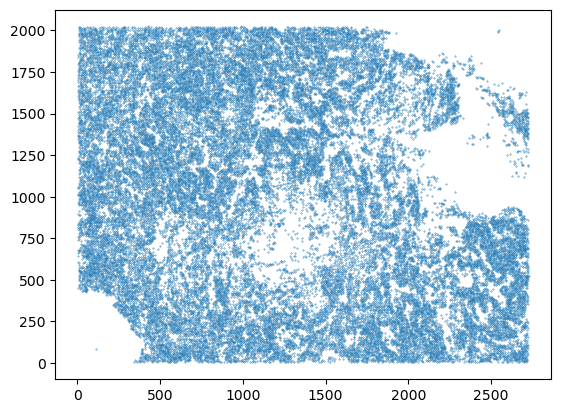

In [24]:
plt.scatter(ss['Location_Center_X'], ss['Location_Center_Y'],s=0.1)